1.	A list rotation consists of taking the last element and moving it to the front. For instance, if we rotate the list [1,2,3,4,5], we get [5,1,2,3,4]. If we rotate it again, we get [4,5,1,2,3].
Write a Python function rotatelist(ls,k) that takes a list ls and a positive integer k and returns the list ls after k rotations. If k is not positive, your function should return ls unchanged. Note that your function should not change ls itself, and should return the rotated list.

Here are some examples to show how your function should work:
•	rotatelist([1,2,3,4,5], 1)                 	 #output is [5, 1, 2, 3, 4] 
•	rotatelist([1,2,3,4,5], 3)  		 #output is [3, 4, 5, 1, 2] 
•	rotatelist([1,2,3,4,5], 12)  		 #output is[4, 5, 1, 2, 3]


In [1]:
def rotatelist(lst,k):
    n_list = [i for i in lst]
    r_list = [i for i in lst]
    r_list[0] = lst[-1]
    r_list[1:len(lst)] = lst[0:len(lst)-1]
    for i in range(k):
        n_list = rotatelist(r_list,i) #recursion
    return n_list

In [2]:
a = [1, 2, 3, 4, 5]
rotatelist(a,12)

[4, 5, 1, 2, 3]

2.	Define a Python function ascending(ls) that returns True if each element in its input list is at least as big as the one before it. For empty list, it should be True. Here are some examples to show how your function should work.


•	ascending([]) 	                 	#returns True 
•	ascending([3,3,4])              	#returns True 
•	ascending([7,18,17,19])   	 	#returns False


In [3]:
def ascending(lst):
    if lst == []:
        return True
    for i in range(len(lst)):
        if lst[i]>=lst[i+1]:
            return True
        else:
            return False

In [4]:
ascending([7,18,17,19])   

False

5.	Read a sentence from keyboard input. Write a program to display a sorted list of tuples where each tuple contains a word in the sentence and its length. The sorting of tuples should be in a descending order of the length of words. If two words have same length, then they must be sorted based on the alphabetical order of words. For example, if the input string is ‘Hi how are you?”, then the output must be


[(‘you?’, 4), (‘are’, 3), (‘how’, 3), (‘Hi’, 2)]


In [5]:
sentence = 'Hi how are you?'

tup_list = []
for i in sentence.split():
    n = len(i)
    tup = (i,n)
    tup_list.append(tup)
    
tup_list.sort(key = lambda tup: (-tup[1],tup[0])) #inline functions

print(tup_list)

[('you?', 4), ('are', 3), ('how', 3), ('Hi', 2)]


6.	Given the data-set of different factors that affect Life Expectancy named as “LifeExpectancyData.csv”. This data contains the information collected for several countries over the years. Perform the following tasks:
    
    
•	Drop the duplicate records.
•	Take appropriate action on missing value treatment. 
•	Prepare a dataframe by combining all the records pertaining to each country.
•	Perform data analysis on infant death rates, adult mortality rates, education level, etc. based on population of the countries. Bring out insights and inferences from the data. Plot necessary graphs to visualize the analysis.


In [40]:
import pandas as pd
import numpy as np
Lfexp_df = pd.read_csv('LifeExpectancyData.csv')
Lfexp_df

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,GDP,Population,Schooling
0,Afghanistan,65.0,263,62.0,0.01,71.279624,1154.0,19.1,83.0,8.16,584.259210,33736494.0,10.1
1,Afghanistan,59.9,271,64.0,0.01,73.523582,492.0,18.6,86.0,8.18,612.696514,327582.0,10.0
2,Afghanistan,59.9,268,66.0,0.01,73.219243,430.0,18.1,89.0,8.13,631.744976,31731688.0,9.9
3,Afghanistan,59.5,272,69.0,0.01,78.184215,2787.0,17.6,93.0,8.52,669.959000,3696958.0,9.8
4,Afghanistan,59.2,275,71.0,0.01,7.097109,3013.0,17.2,97.0,NaN,63.537231,NaN,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Argentina,74.0,138,12.0,7.76,123.012867,0.0,54.6,13.0,9.38,717.694674,3747159.0,15.6
95,Argentina,74.1,137,12.0,7.68,1349.025282,6.0,54.0,14.0,9.21,7669.273916,3757452.0,15.0
96,Armenia,74.8,118,1.0,NaN,0.000000,33.0,54.9,1.0,NaN,369.654776,291695.0,12.7
97,Armenia,74.6,12,1.0,3.91,295.608714,13.0,54.1,1.0,4.48,3994.712355,29622.0,12.7


In [41]:
Lfexp_df.duplicated().sum() # no duplicates

0

In [42]:
Null_cnt = Lfexp_df.isnull().sum() # null values in each feature
Null_cnt

Country                    0
Life expectancy            2
Adult Mortality            0
infant deaths              1
Alcohol                    6
percentage expenditure     3
Measles                    1
BMI                        2
under-five deaths          2
Total expenditure          6
GDP                        2
Population                18
Schooling                  0
dtype: int64

In [43]:
Null_cnt[-2]/len(Lfexp_df) # 18% values missing in population

0.18181818181818182

In [44]:
Lfexp_df.dropna(inplace = True) # can drop the missing values as the highest is 6 in 'Alcohol' feature which is arount 6% and can be accepltable

In [60]:
Lfexpbycountry_df = Lfexp_df.groupby(by = 'Country').sum()
Lfexpbycountry_df # Total data by country

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,GDP,Population,Schooling
Country,,,,,,,,,,,,
Afghanistan,641.7,2870,848.0,0.14,461.646204,28170.0,172.2,1164.0,89.83,4413.817026,129327105.0,90.2
Albania,756.7,480,6.0,50.35,2200.594763,786.0,485.3,9.0,59.25,23786.767691,10150085.0,124.6
Algeria,1027.9,1589,284.0,5.60,3426.900209,30932.0,667.6,329.0,63.70,37564.060127,302979135.0,175.9
Angola,635.4,4171,1101.0,74.06,1322.489910,53798.0,227.5,1749.0,50.32,23114.658195,117465563.0,102.0
Argentina,1126.2,1580,154.0,119.50,12368.623701,32.0,816.9,173.0,103.69,98510.078050,278521507.0,246.8
Armenia,149.0,135,2.0,7.70,575.037795,23.0,107.4,2.0,9.03,7838.303568,318981.0,25.4


In [61]:
Lfexpbycountry_df = Lfexp_df.groupby(by = 'Country').mean()
Lfexpbycountry_df # Mean data by country

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,GDP,Population,Schooling
Country,,,,,,,,,,,,
Afghanistan,58.336364,260.909091,77.090909,0.012727,41.967837,2560.909091,15.654545,105.818182,8.166364,401.256093,1.175701e+07,8.200000
Albania,75.670000,48.000000,0.600000,5.035000,220.059476,78.600000,48.530000,0.900000,5.925000,2378.676769,1.015008e+06,12.460000
Algeria,73.421429,113.500000,20.285714,0.400000,244.778586,2209.428571,47.685714,23.500000,4.550000,2683.147152,2.164137e+07,12.564286
Angola,48.876923,320.846154,84.692308,5.696923,101.729993,4138.307692,17.500000,134.538462,3.870769,1778.050630,9.035813e+06,7.846154
Argentina,75.080000,105.333333,10.266667,7.966667,824.574913,2.133333,54.460000,11.533333,6.912667,6567.338537,1.856810e+07,16.453333
Armenia,74.500000,67.500000,1.000000,3.850000,287.518898,11.500000,53.700000,1.000000,4.515000,3919.151784,1.594905e+05,12.700000


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:xlabel='Country', ylabel='Schooling'>

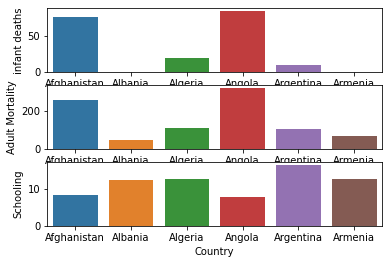

In [79]:
# Average infant death by Country
fig, axs = plt.subplots(3)
sns.barplot(x = Lfexpbycountry_df.index, y = Lfexpbycountry_df['infant deaths'], ax = axs[0])
sns.barplot(x = Lfexpbycountry_df.index, y = Lfexpbycountry_df['Adult Mortality'], ax = axs[1])
sns.barplot(x = Lfexpbycountry_df.index, y = Lfexpbycountry_df['Schooling'], ax = axs[2])

# Based on the above we can see that Albania has the best life expectancy, How ever, further analysis is required based on population.